In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Bayer/raw_data_tablet press.csv', on_bad_lines='skip')

In [ ]:
print(df1.shape)
df1.head()

(1047792, 10)


,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;
0,0,1,dpMeasuredValueStation1p050,Main motor current max,perf,number,ns=2;s=131,3.9,VariantType.Double,2021-04-09T01:07:55.357000Z
1,1,1,dpMeasuredValueStation1p045,Punch tight mov./stiffness top,perf,number,ns=2;s=126,129.0,VariantType.Double,2021-04-09T01:07:55.816000Z
2,2,1,dpMeasuredValueStation1p092,Eject force max,perf,number,ns=2;s=145,265.0,VariantType.Double,2021-04-09T01:07:55.816000Z
3,3,1,dpMeasuredValueStation1p051,FOM motor current max,perf,number,ns=2;s=132,1.2,VariantType.Double,2021-04-09T01:07:56.492000Z
4,4,1,dpMeasuredValueStation1p046,Punch tight mov./stiffness bottom,perf,number,ns=2;s=127,55.0,VariantType.Double,2021-04-09T01:07:59.167000Z


In [ ]:
df2 = pd.read_excel (r'/content/gdrive/My Drive/Colab Notebooks/Bayer/Tag Translation Table_Tablet Press.xlsx')

In [ ]:
print(df2.shape)
df2.head()

(103, 11)


,sapparametername,tagdescription,sapcapabilityalternateid,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
0,dpChangeMessageText,Change text,Set,Änderungstext,0,Text,Change text,0,Text,Keine Angabe,string
1,dpDataStringBatch,Name of batch,Batch,Name der Charge,0,Text,Name of batch,0,Text,Keine Angabe,string
2,dpDataStringMachineNumber,Type of machine (number),Set,Typ der Maschine (number),0,Text,Type of machine (number),0,Text,Keine Angabe,string
3,dpDataStringMachineType,Type of machine,Set,Typ der Maschine,0,Text,Type of machine,0,Text,Keine Angabe,string
4,dpDataStringProductName,Name of product/recipe,Batch,Name des Produkts/Rezepts,0,Text,Name of product/recipe,0,Text,Keine Angabe,string


In [ ]:
print (len((df1['sapparametername'].unique())))
print (len((df2['sapparametername'].unique())))

102
103


In [ ]:
print (len((df1['tagdescription'].unique())))
print (len((df2['tagdescription'].unique())))

72
75


In [ ]:
print (len((df1['sapcapabilityalternateid'].unique())))
print (len((df2['sapcapabilityalternateid'].unique())))

6
6


In [ ]:
df_merged = pd.merge(df1, df2, on=['sapparametername', 'tagdescription', 'sapcapabilityalternateid'], how='left')
#df_merged = pd.merge(df1, df2, on=['sapparametername', ], how='inner')

In [ ]:
df_merged.shape

(1047792, 18)

In [ ]:
print(df_merged.shape)
df_merged.head(2)

(1047792, 18)


,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
0,0,1,dpMeasuredValueStation1p050,Main motor current max,perf,number,ns=2;s=131,3.9,VariantType.Double,2021-04-09T01:07:55.357000Z,Hauptmotor Strom maximal,Hauptmotor Strom maximal in Ampere Über den Fr...,A,Main motor current max,Main motor current maximum in amps The current...,A,50,number
1,1,1,dpMeasuredValueStation1p045,Punch tight mov./stiffness top,perf,number,ns=2;s=126,129.0,VariantType.Double,2021-04-09T01:07:55.816000Z,Stempelschwergängigkeit oben,Stempelschwergängigkeit oben in Newton. Hier w...,N,Punch tight mov./stiffness top,Punch gravity top in Newton. Here the limit fo...,N,45,number


In [ ]:
print (len((df_merged['sapparametername'].unique())))

102


In [ ]:
# Check if the merging is correct with some examples

In [ ]:
test = df_merged['sapparametername'].unique()

In [ ]:
print(len(test))
test

In [ ]:
cnt = 0
for x in range(0, 102):
  chk_df1 = df_merged[df_merged['sapparametername'] == test[x]]
  res1= chk_df1['[DE] Parameter Beschreibung'].unique()
  chk_df2 = df2[df2['sapparametername'] == test[x]]
  res2 = chk_df2['[DE] Parameter Beschreibung'].unique()
  if(res1 == res2):
    cnt = cnt + 1
  else:
    print(x)  

31
83
90


In [ ]:
cnt

99

In [ ]:
chk_df1 = df_merged[df_merged['sapparametername'] == test[31]]
chk_df1.head(2)

,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
1614,1614,1,dpDataStringMachineNumber,Type of machine,Set,string,ns=2;s=28,191711,VariantType.String,2021-03-23T11:19:05.727000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4467,4475,1,dpDataStringMachineNumber,Type of machine,Set,string,ns=2;s=28,191711,VariantType.String,2021-03-23T11:19:05.727000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
chk_df2 = df2[df2['sapparametername'] == test[31]]
chk_df2

,sapparametername,tagdescription,sapcapabilityalternateid,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
2,dpDataStringMachineNumber,Type of machine (number),Set,Typ der Maschine (number),0,Text,Type of machine (number),0,Text,Keine Angabe,string


In [ ]:
chk_df1 = df_merged[df_merged['sapparametername'] == test[31]]
chk_df1.index

Int64Index([   1614,    4467,   13951,   15026,   16627,   17868,   24247,
              24349,   24449,   26800,
            ...
             694299,  702915,  753088,  797208,  804169,  895420, 1000009,
            1017298, 1042001, 1046285],
           dtype='int64', length=162)

In [ ]:
df_merged.loc[ chk_df1.index,'[DE] Parameter Beschreibung'] = 'Typ der Maschine (number)'

df_merged.loc[ chk_df1.index,'[DE] Parameter Erklärung'] = 0

df_merged.loc[ chk_df1.index,'[DE] Parameter Einheit'] = 'Text'

df_merged.loc[ chk_df1.index,'[EN] Parameter Description'] = 'Type of machine (number)'

df_merged.loc[ chk_df1.index,'[EN] Parameter Explanation'] = 0

df_merged.loc[ chk_df1.index,'[EN] Parameter Unit'] = 'Text'

df_merged.loc[ chk_df1.index,'Parameter Code'] = 'Keine Angabe'

df_merged.loc[ chk_df1.index,'Data Type (String/Number)'] = 'string'



In [ ]:
chk_df_test = df_merged[df_merged['sapparametername'] == test[31]]
chk_df_test.head(2)

,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
1614,1614,1,dpDataStringMachineNumber,Type of machine,Set,string,ns=2;s=28,191711,VariantType.String,2021-03-23T11:19:05.727000Z,Typ der Maschine (number),0,Text,Type of machine (number),0,Text,Keine Angabe,string
4467,4475,1,dpDataStringMachineNumber,Type of machine,Set,string,ns=2;s=28,191711,VariantType.String,2021-03-23T11:19:05.727000Z,Typ der Maschine (number),0,Text,Type of machine (number),0,Text,Keine Angabe,string


In [ ]:
chk_df1 = df_merged[df_merged['sapparametername'] == test[83]]
chk_df1.head(2)

,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
1681,1681,1,dpSetpointValueStation1p056,Per no. of tablets,Set,number,ns=2;s=296,0.0,VariantType.Double,2021-03-23T11:19:06.492000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4545,4553,1,dpSetpointValueStation1p056,Per no. of tablets,Set,number,ns=2;s=296,0.0,VariantType.Double,2021-03-23T11:19:06.492000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
chk_df2 = df2[df2['sapparametername'] == test[83]]
chk_df2

,sapparametername,tagdescription,sapcapabilityalternateid,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
85,dpSetpointValueStation1p056,Per no. of tablets (pulse),Set,pro Anzahl Tabletten (pulse),Pro Anzahl Tabletten mal 1000. “Parameter 56 i...,x1000,Per no. of tablets (pulse),"Per number of tablets times 1000. ""Parameter 5...",x1000,56,number


In [ ]:
chk_df1 = df_merged[df_merged['sapparametername'] == test[83]]
chk_df1.index

Int64Index([   1681,    4545,   14021,   15093,   16696,   17940,   24317,
              24419,   24522,   26870,
            ...
             694366,  702983,  753159,  797279,  804238,  895491, 1000078,
            1017369, 1042071, 1046357],
           dtype='int64', length=160)

In [ ]:
df_merged.loc[ chk_df1.index,'[DE] Parameter Beschreibung'] = 'pro Anzahl Tabletten (pulse)'

df_merged.loc[ chk_df1.index,'[DE] Parameter Erklärung'] = 'Pro Anzahl Tabletten mal 1000. “Parameter 56 i.'

df_merged.loc[ chk_df1.index,'[DE] Parameter Einheit'] = 'x1000'

df_merged.loc[ chk_df1.index,'[EN] Parameter Description'] = 'Per no. of tablets (pulse)'

df_merged.loc[ chk_df1.index,'[EN] Parameter Explanation'] = 'Per number of tablets times 1000. "Parameter 5..'

df_merged.loc[ chk_df1.index,'[EN] Parameter Unit'] = 'x1000'

df_merged.loc[ chk_df1.index,'Parameter Code'] = 56

df_merged.loc[ chk_df1.index,'Data Type (String/Number)'] = 'number'



In [ ]:
chk_df_test = df_merged[df_merged['sapparametername'] == test[83]]
chk_df_test.head(2)

,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
1681,1681,1,dpSetpointValueStation1p056,Per no. of tablets,Set,number,ns=2;s=296,0.0,VariantType.Double,2021-03-23T11:19:06.492000Z,pro Anzahl Tabletten (pulse),Pro Anzahl Tabletten mal 1000. “Parameter 56 i.,x1000,Per no. of tablets (pulse),"Per number of tablets times 1000. ""Parameter 5..",x1000,56,number
4545,4553,1,dpSetpointValueStation1p056,Per no. of tablets,Set,number,ns=2;s=296,0.0,VariantType.Double,2021-03-23T11:19:06.492000Z,pro Anzahl Tabletten (pulse),Pro Anzahl Tabletten mal 1000. “Parameter 56 i.,x1000,Per no. of tablets (pulse),"Per number of tablets times 1000. ""Parameter 5..",x1000,56,number


In [ ]:
chk_df1 = df_merged[df_merged['sapparametername'] == test[90]]
chk_df1.head(2)

,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
1688,1688,1,dpSetpointValueStation1p054,Per no. of tablets,Set,number,ns=2;s=294,172.0,VariantType.Double,2021-03-23T11:19:06.477000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4535,4543,1,dpSetpointValueStation1p054,Per no. of tablets,Set,number,ns=2;s=294,172.0,VariantType.Double,2021-03-23T11:19:06.477000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
chk_df2 = df2[df2['sapparametername'] == test[90]]
chk_df2

,sapparametername,tagdescription,sapcapabilityalternateid,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
83,dpSetpointValueStation1p054,Per no. of tablets (bad),Set,pro Anzahl Tabletten (schlecht),“Parameter 54” ist die Bezugszahl für die “Pa...,Anzahl,Per no. of tablets (bad),"""Parameter 54"" is the reference number for ""P...",Unit,54,number


In [ ]:
chk_df1 = df_merged[df_merged['sapparametername'] == test[90]]
chk_df1.index

Int64Index([   1688,    4535,   14019,   15092,   16694,   17938,   24316,
              24418,   24520,   26868,
            ...
             694365,  702981,  753157,  797277,  804235,  895490, 1000075,
            1017368, 1042069, 1046354],
           dtype='int64', length=167)

In [ ]:
df_merged.loc[ chk_df1.index,'[DE] Parameter Beschreibung'] = 'pro Anzahl Tabletten (schlecht)'

df_merged.loc[ chk_df1.index,'[DE] Parameter Erklärung'] = '“Parameter 54” ist die Bezugszahl für die “Pa...'

df_merged.loc[ chk_df1.index,'[DE] Parameter Einheit'] = 'Anzahl'

df_merged.loc[ chk_df1.index,'[EN] Parameter Description'] = 'Per no. of tablets (bad)'

df_merged.loc[ chk_df1.index,'[EN] Parameter Explanation'] = '"Parameter 54" is the reference number for "P...'

df_merged.loc[ chk_df1.index,'[EN] Parameter Unit'] = 'Unit'

df_merged.loc[ chk_df1.index,'Parameter Code'] = 54

df_merged.loc[ chk_df1.index,'Data Type (String/Number)'] = 'number'



In [ ]:
chk_df_test = df_merged[df_merged['sapparametername'] == test[90]]
chk_df_test.head(2)

,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
1688,1688,1,dpSetpointValueStation1p054,Per no. of tablets,Set,number,ns=2;s=294,172.0,VariantType.Double,2021-03-23T11:19:06.477000Z,pro Anzahl Tabletten (schlecht),“Parameter 54” ist die Bezugszahl für die “Pa...,Anzahl,Per no. of tablets (bad),"""Parameter 54"" is the reference number for ""P...",Unit,54,number
4535,4543,1,dpSetpointValueStation1p054,Per no. of tablets,Set,number,ns=2;s=294,172.0,VariantType.Double,2021-03-23T11:19:06.477000Z,pro Anzahl Tabletten (schlecht),“Parameter 54” ist die Bezugszahl für die “Pa...,Anzahl,Per no. of tablets (bad),"""Parameter 54"" is the reference number for ""P...",Unit,54,number


In [ ]:
df_merged.columns[df_merged.isna().any()].tolist()

['value']

In [ ]:
df_merged.head(5)

,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number)
0,0,1,dpMeasuredValueStation1p050,Main motor current max,perf,number,ns=2;s=131,3.9,VariantType.Double,2021-04-09T01:07:55.357000Z,Hauptmotor Strom maximal,Hauptmotor Strom maximal in Ampere Über den Fr...,A,Main motor current max,Main motor current maximum in amps The current...,A,50,number
1,1,1,dpMeasuredValueStation1p045,Punch tight mov./stiffness top,perf,number,ns=2;s=126,129.0,VariantType.Double,2021-04-09T01:07:55.816000Z,Stempelschwergängigkeit oben,Stempelschwergängigkeit oben in Newton. Hier w...,N,Punch tight mov./stiffness top,Punch gravity top in Newton. Here the limit fo...,N,45,number
2,2,1,dpMeasuredValueStation1p092,Eject force max,perf,number,ns=2;s=145,265.0,VariantType.Double,2021-04-09T01:07:55.816000Z,Tabletten Ausstosskraft,Tabletten Ausstosskraft in Newton. Nach Einga...,N,Eject force max,Tablet ejection force in Newton. After enteri...,N,92,number
3,3,1,dpMeasuredValueStation1p051,FOM motor current max,perf,number,ns=2;s=132,1.2,VariantType.Double,2021-04-09T01:07:56.492000Z,FOM Motor Strom max,Fillo-Matic Motor Strom maximal in Ampere. Übe...,A,FOM motor current max,Fillo-Matic motor current maximum in amperes. ...,A,51,number
4,4,1,dpMeasuredValueStation1p046,Punch tight mov./stiffness bottom,perf,number,ns=2;s=127,55.0,VariantType.Double,2021-04-09T01:07:59.167000Z,Stempelschwergängigkeit unten,Stempelschwergängigkeit unten in Newton Hier w...,N,Punch tight mov./stiffness bottom,Bottom punch sluggishness in Newton Here the l...,N,46,number


In [ ]:
df_merged['nodeid']

0          ns=2;s=131
1          ns=2;s=126
2          ns=2;s=145
3          ns=2;s=132
4          ns=2;s=127
              ...    
1047787    ns=2;s=132
1047788     ns=2;s=96
1047789    ns=2;s=132
1047790    ns=2;s=132
1047791    ns=2;s=145
Name: nodeid, Length: 1047792, dtype: object

In [ ]:
df_merged[['nodeid_ns', 'nodeid_s']] = df_merged['nodeid'].str.split(';', expand=True)

In [ ]:
df_merged.head(5)

,Unnamed: 0,usecaseid,sapparametername,tagdescription,sapcapabilityalternateid,sapdatatype,nodeid,value,type,time;,[DE] Parameter Beschreibung,[DE] Parameter Erklärung,[DE] Parameter Einheit,[EN] Parameter Description,[EN] Parameter Explanation,[EN] Parameter Unit,Parameter Code,Data Type (String/Number),nodeid_ns,nodeid_s
0,0,1,dpMeasuredValueStation1p050,Main motor current max,perf,number,ns=2;s=131,3.9,VariantType.Double,2021-04-09T01:07:55.357000Z,Hauptmotor Strom maximal,Hauptmotor Strom maximal in Ampere Über den Fr...,A,Main motor current max,Main motor current maximum in amps The current...,A,50,number,ns=2,s=131
1,1,1,dpMeasuredValueStation1p045,Punch tight mov./stiffness top,perf,number,ns=2;s=126,129.0,VariantType.Double,2021-04-09T01:07:55.816000Z,Stempelschwergängigkeit oben,Stempelschwergängigkeit oben in Newton. Hier w...,N,Punch tight mov./stiffness top,Punch gravity top in Newton. Here the limit fo...,N,45,number,ns=2,s=126
2,2,1,dpMeasuredValueStation1p092,Eject force max,perf,number,ns=2;s=145,265.0,VariantType.Double,2021-04-09T01:07:55.816000Z,Tabletten Ausstosskraft,Tabletten Ausstosskraft in Newton. Nach Einga...,N,Eject force max,Tablet ejection force in Newton. After enteri...,N,92,number,ns=2,s=145
3,3,1,dpMeasuredValueStation1p051,FOM motor current max,perf,number,ns=2;s=132,1.2,VariantType.Double,2021-04-09T01:07:56.492000Z,FOM Motor Strom max,Fillo-Matic Motor Strom maximal in Ampere. Übe...,A,FOM motor current max,Fillo-Matic motor current maximum in amperes. ...,A,51,number,ns=2,s=132
4,4,1,dpMeasuredValueStation1p046,Punch tight mov./stiffness bottom,perf,number,ns=2;s=127,55.0,VariantType.Double,2021-04-09T01:07:59.167000Z,Stempelschwergängigkeit unten,Stempelschwergängigkeit unten in Newton Hier w...,N,Punch tight mov./stiffness bottom,Bottom punch sluggishness in Newton Here the l...,N,46,number,ns=2,s=127


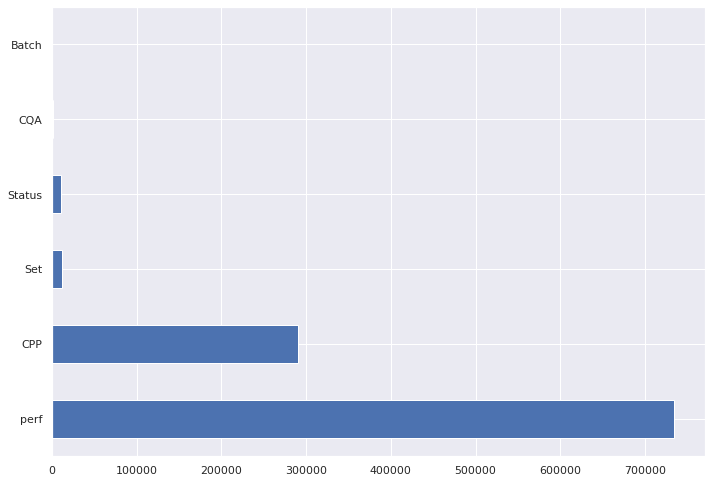

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
# plot value_counts of Series
ax = df_merged.sapcapabilityalternateid.value_counts().plot(kind='barh')
ax.set_xscale('linear')

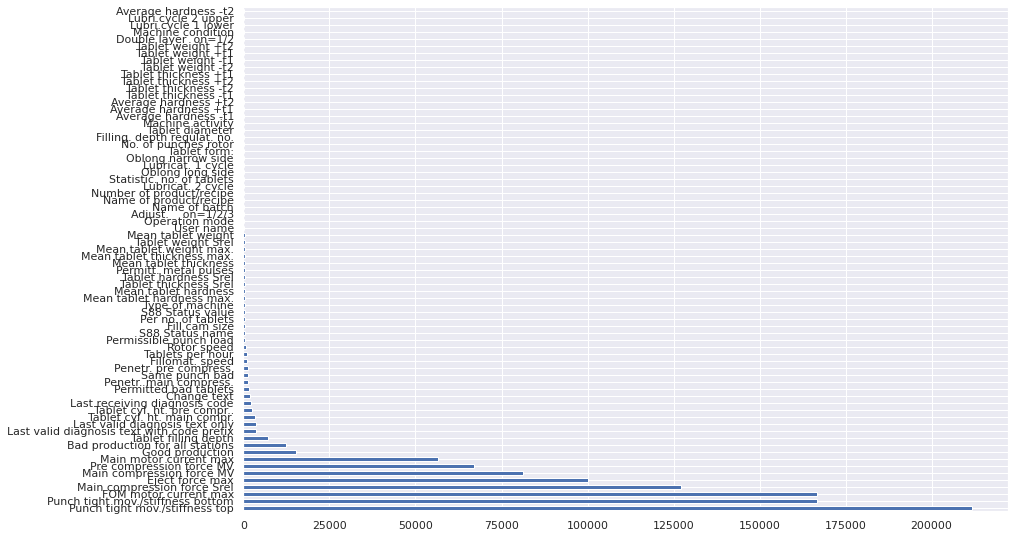

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13.7,9.27)})
# plot value_counts of Series
ax = df_merged.tagdescription.value_counts().plot(kind='barh')
ax.set_xscale('linear')

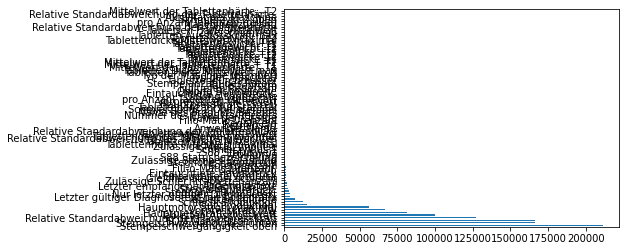

In [ ]:
import seaborn as sns

# plot value_counts of Series
ax = df_merged['[DE] Parameter Beschreibung'].value_counts().plot(kind='barh')
ax.set_xscale('linear')




In [ ]:
df3 = pd.read_excel ('/content/gdrive/My Drive/Colab Notebooks/Bayer/Tag Translation Table_Tablet Press.xlsx', sheet_name= 'Diagnosis List')

In [ ]:
print(df3.shape)
df3.head(5)

(216, 10)


,Diagnosenummer,Beschreibung,Kategorie,Priorisierung,Beschreibung (DE),Empfehlungshandlung (DE),Title (EN),Prioritization,Description (EN),Suggestion
0,1015,Verbindung IC <--> Presse Unterbrochen,Bedienterminal,Anzeige Diagnose,Die Verbindung zwischen dem IC und der Presse ...,NaN,Link IC <-> press link interrupted,Display of diagnosis,The link between IC and press has been interru...,NaN
1,1016,Übertragungsfehler Checkmaster,Bedienterminal,Anzeige Diagnose,Übertragungsprotokoll Fehler: Bei der Übertrag...,NaN,Checkmaster transfer error (TT1),Display of diagnosis,Transfer report error Errors occurred during d...,NaN
2,1018,Übertragungsfehler Leanmaster (LM ):,Bedienterminal,Anzeige Diagnose,Übertragungsprotokoll Fehler: Bei der Übertrag...,NaN,/,Display of diagnosis,NaN,NaN
3,1050,Fehler beim Datenexport,Bedienterminal,Anzeige Diagnose,Beim Exportieren von Daten ist ein Fehler aufg...,NaN,Error during data export,Display of diagnosis,An error occurred during data export. The ind...,NaN
4,1100,Akku-Spannung unter Warngrenze,Bedienterminal,Anzeige Diagnose,Die Spannung des Akkus liegt unterhalb der ein...,NaN,Battery voltage below warning limit,Display of diagnosis,The battery voltage (rechargeable battery) is ...,NaN


In [ ]:
chk_df3 = df3[df3['Prioritization'] == 'Display of diagnosis']

In [ ]:
print(chk_df3['Diagnosenummer'].unique())

print(chk_df3['Kategorie'].unique())

print(chk_df3['Description (EN)'].unique())

[1015 1016 1018 1050 1100 1200 1201 1235 2014 5010 5012 5030 5032 8250
 8820]
['Bedienterminal ' 'Maschinenrechner' 'Produktions Verfahren'
 'Peripherie Geräte']
['The link between IC and press has been interrupted.  Possible causes:  defective mains supply cable  machine computer is not working  The system will now attempt to reestablish the link automatically.'
 'Transfer report error Errors occurred during data transfer from IC to the Checkmaster computer. If the error does not occur in following transfers, the diagnosis is cancelled. '
 nan
 'An error occurred during data export.  The index number indicates further information:  The batch content directory on the target drive is full or could not be created.  Not possible to write on target drive No data carrier available or data carrier write-protected.  Not enough free memory capacity on data carrier to write the required data.  An error occurred during writing the data.'
 'The battery voltage (rechargeable battery) is below the 